# ARMA Filter

In [27]:
import numpy as np
from numpy.random import default_rng
import scipy.signal as sig
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stools
import statsmodels.tsa.arima_process as arima
import statsmodels.tsa.arima.model as model

plt.rcParams["figure.figsize"] = (8,5)
rng = default_rng()

In [43]:
u = rng.standard_normal(50)

<StemContainer object of 3 artists>

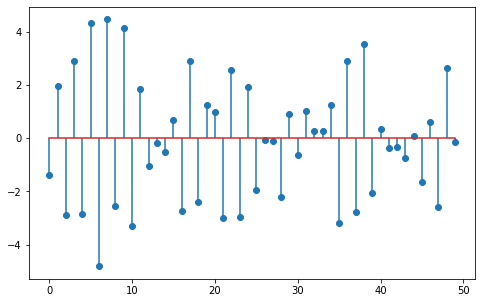

In [44]:
a = [1, 0.6, -0.2]
b = [1, -0.4, 0.2]

y = sig.lfilter(b,a,u)
plt.stem(y)

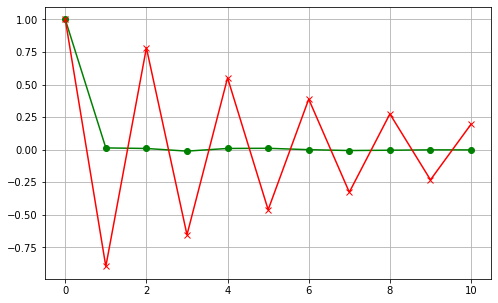

In [45]:
u = rng.standard_normal(10000)
x = sig.lfilter(b,a,u)

acf_u = stools.acf(u, nlags=10, fft=False)
acf_x = stools.acf(x, nlags=10, fft=False)

plt.plot(acf_u, '-go', acf_x, '-rx')
plt.grid()

In [46]:
acf_x

array([ 1.        , -0.89581999,  0.78143409, -0.6529626 ,  0.55080684,
       -0.46106039,  0.38776633, -0.32645028,  0.27435183, -0.23130201,
        0.19557549])

In [47]:
arima.arma_acf(a, b, lags=7)

array([ 1.        , -0.89449541,  0.77522936, -0.6440367 ,  0.54146789,
       -0.45368807,  0.38050642])

Fit a filter to a given ACF => not sure if this is even possible?

In [48]:
m = model.ARIMA(x, order =  (2, 0, 2))
res = m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -14333.131
Date:                Mon, 23 Aug 2021   AIC                          28678.261
Time:                        13:16:21   BIC                          28721.523
Sample:                             0   HQIC                         28692.905
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.819e-05      0.006      0.006      0.995      -0.012       0.012
ar.L1         -0.5839      0.059     -9.977      0.000      -0.699      -0.469
ar.L2          0.2217      0.053      4.214      0.000       0.119       0.325
ma.L1         -0.4017      0.058     -6.957      0.000      -0.515      -0.289
ma.L2          0.1942      0.011     17.222      0.000       0.172       0.216
sigma2         1.0290      0.014     71.128      0.000       1.001       1.057
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.94   Prob(JB):                         0.64
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""